In [2]:
! pip install latex

  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7606 sha256=f7950636209043827eb1a9df8f3c4cf6ba3c0b672ae579a36f05080504e69de9
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7245 sha256=f578f50fc7f499eeb422ac54f0a049f10670a2189ec603e27a81d7a02b787f65
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2782 sha256=513e76acca4b3f68c99838f1e6bb9080671b7105b555d14897a4f167ae95e6a4
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2213 sha256=a5be6a3502d3e0c20fcdd5c36753553ca59e87429e21790a2905596b0c07cc42
  Stored in directory: /root/.cache/pip/wheels/7a/f1/d7/124b54c21a9ba4973bc60fc

# Bayesian Coin Flips

Lets say we flip a coin, and get $D$={$h$ heads and $t$ tails}, the probability follows a  <a href="https://en.wikipedia.org/wiki/Binomial_distribution" target="_blank">binomial distribution</a>
$$ P(D|\theta) = {\binom {t+h}{h}}\theta^{h}(1-\theta)^{t} $$
where ${\displaystyle {\binom {t+h}{h}}={\frac {t+h!}{h!t!}}}$
and $D$ is the event of getting $h$ heads and $t$ tails, $\theta$ is the probability of heads, and $1-\theta$ is the probability of tails. Let say we want to flip the conditional probability using Bayes' theorem:
                                 $$ P(\theta|D) = {\dfrac {P(D|\theta)P(\theta)}{P(D)}} $$
                                <p>
                                    <strong>Why do we want to write the conditional probability this way?</strong>
                                </p>
                                <p>The conditional probability, $P(\theta|D)$, treats the probability of heads, $\theta$, as a random variable. It is the probability of $\theta$, given that we observed the event $D$. To make speaking of these probabilies easier they are given names:</p>
                                <ul>
                                    <li>$P(\theta)$: the prior</li>
                                    <li>$P(\theta|D)$: the posterior</li>
                                    <li>$P(D|\theta)$: the likelihood</li>
                                </ul>
                                <p>For example, lets say we flipped some coins and observed $h=3$ heads and $t=5$ tails, ($D$ is the event of 3 heads and 5 tails), the posterior allows us to obtain the probabilities of $P(\theta=0.1|D)$ or $P(\theta=0.7|D)$, etc. The posterior givens us probabilities for all possible values of $\theta$ (the probability of heads).</p>

## Prior

 <p>
                                    Next, lets look at the prior, $P (\theta)$, this is the probability of $\theta$ before any coin flips. In other words, this is the measure of the belief 
                                    <em>before</em>
                                     we perform the experiment. For the coin flipping example, we normally come across coins that have $\theta=0.5$, so our prior should center around 0.5. For now, lets pick a 
                                    <a href="https://en.wikipedia.org/wiki/Beta_distribution" target="_blank">beta distribution</a>
                                     with $\alpha=2$ and $\beta=2$ as our prior:
                                </p>
                                 $$ P(\theta) = \dfrac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} $$
                                <p>
                                    where $B(\alpha, \beta)$ is the 
                                    <a href="https://en.wikipedia.org/wiki/Beta_function" target="_blank">Beta Function</a>
                                    . This prior is centered at 0.5 and is lower for all other values. Let's graph the beta prior distribution:
                                </p>

In [11]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import latex

# configure style
mpl.rc('text')#, usetex=True)
mpl.rc('font', size=26)
sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.5)
current_palette = sns.color_palette()

def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"theta", fontsize=20)
    ax.set_ylabel(r"P__theta", fontsize=20)
    #ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));

plot_prior(alpha=2, beta=2)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa715606830> (for post_execute):


RuntimeError: ignored

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>

The maximum of our prior is centered at 0.5 and is lower for other values. This means that we normally see coins which are fair, but do not rule out that there is a chance that the coin could be unfair.

## Evidence / Marginal Likelihood $P(D)$

 <p>The last thing we need to get the posterior is the denominator of bayes theorem, $P(D)$, which is the probability of the event happening. In general, this is calculated by integrating over all the possible values of $\theta$:</p>
                                 $$ P(D) = \int_0^1 P(D|\theta)P(\theta)d\theta $$
                                <p>Normally this integral would not be possible to do analytically, but since our prior is a beta distribution and our likelihood is a binomial distribution, this integral would be worked out to be:</p>
                                 $$ P(D) = {\binom {t+h}{h}}\dfrac{B(h+\alpha, t+\beta)}{B(\alpha, \beta)} $$
                                <p>For other priors, the integral would not be able to be computed, and other techniques are used to get the posterior, which I will get into in a future blog post.</p>

## Putting everything together to obtain the posterior distribution

 <p>Putting $P(D)$, the prior $P(\theta)$, and likelihood $P(D|\theta)$ together into Bayes' theorem to get the posterior: $$ P(\theta|D) = \dfrac{1}{B(h+\alpha, t+\beta)}\theta^{h+\alpha-1}(1-\theta)^{t+\alpha-1} $$</p>
 which is nothing but a beta distribution with parameters $h+\alpha$ and $t+\beta$. 
  <p>Let's say create function in python to plot the posterior:</p>

In [ ]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

## Numerical Example

 <p>Recall, for our example, $\alpha=2$ and $\beta=2$, thus posterior becomes:</p>
                                 $$ P(\theta|D) = \dfrac{1}{B(h+2, t+2)}\theta^{h+1}(1-\theta)^{t+1} $$
                                 <p>Lets say we flipped the coin 17 times and observed 5 heads and 12 tails, our posterior becomes:</p>
                               

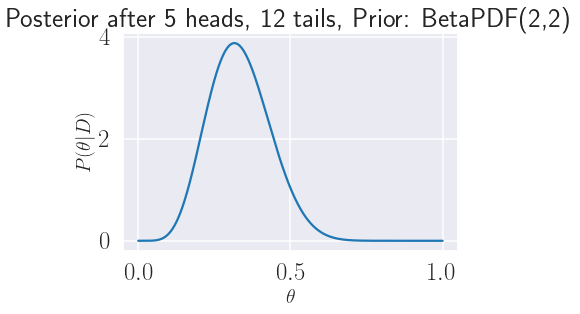

In [ ]:
plot_posterior(heads=5, tails=12, alpha=2, beta=2)

 <p>With 5 heads and 12 tails, our belief of the possible values of $\theta$ shifts to the left, suggesting that $\theta$ is more likely to be lower than $0.5$. Now lets say we flipped 75 times and observed 50 heads and 25 tails:</p>

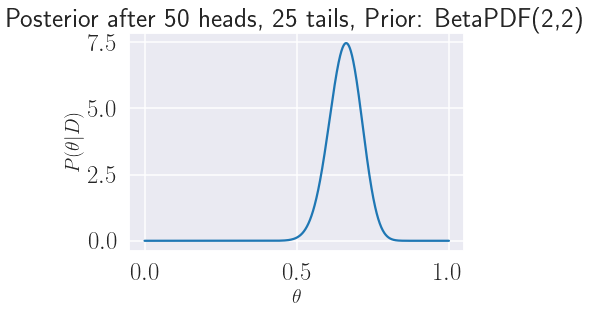

In [ ]:
plot_posterior(heads=50, tails=25, alpha=2, beta=2)

 <p>With that many heads, the posterior shifts to the right, implying that $\theta$ is higher. Notice that the distrubution for 75 flips is narrower than the 17 times. With 75 flips, we have a clearer picture of what the value of $\theta$ should be.</p>

## Different Priors
 <p>
                                    <strong>What would happen when we choose other priors?</strong>
                                </p>
                                <p>We'll explore how to handle non-beta priors in a future blog post. Right now, lets look at what happens when we choose different beta priors. Lets say we come from a world where coins are not 50-50, but are biased toward a bigger $\theta$ (i.e. higher probability to get an head):</p>

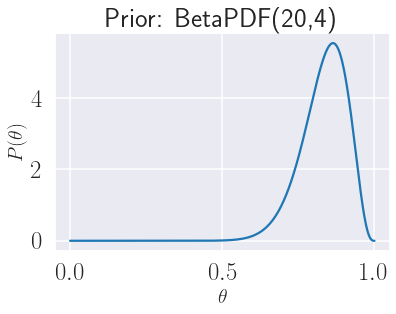

In [ ]:
plot_prior(alpha=20, beta=4)

 <p>Let's see what happens to the posterior when we flip a coin and get:</p>
                                <ul>
                                    <li>4 heads 5 tails</li>
                                    <li>20 heads 20 tails</li>
                                    <li>50 heads 49 tails</li>
                                    <li>75 heads 74 tails</li>
                                    <li>400 heads 399 tails</li>
                                </ul>

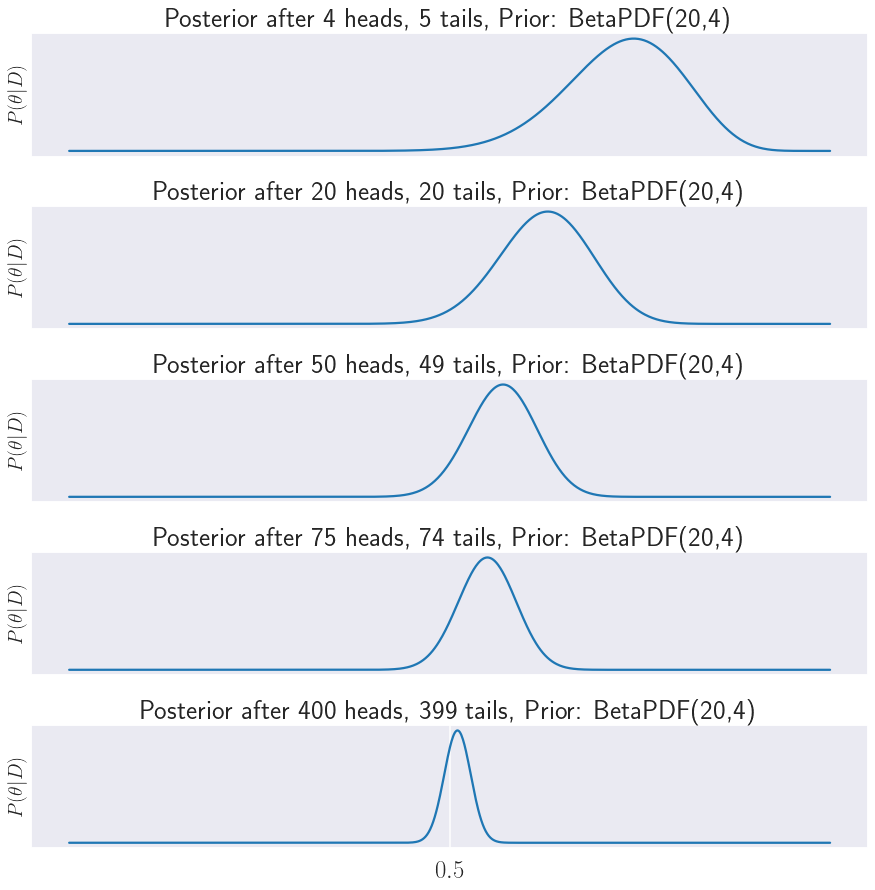

In [ ]:
fig, axes = plt.subplots(5,figsize=(15,15))
flips = [(4, 5), (20, 20), (50, 49), (75, 74), (400, 399)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=20, beta=4, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.4)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.5]);

<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 1 - Comment these results.<br/> -------------------------- </span> 



<span style='font-weight:bold;color:red'> -------------------------- <br/>
    Question 2 - Compare the posterior distribution obtained after observing $h=1$ and $t=0$ by using:  </span> 
    <ul>
       <span style='font-weight:bold;color:red'> <li> a uniform prior distribution (equivalent to Beta distribution  with $\alpha=\beta=1$)</li>
        <li>the previous Beta distribution  with $\alpha=\beta=2$ </li></span>
    </ul>
   <span style='font-weight:bold;color:red'> Comment the results.<br/> -------------------------- </span> 



<span style='color:gray;float:right'>----
    *François Septier - Copernicus Master in Digital Earth*</span>